# Week 2 - Traditional Machine Learning Models

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, neighbors, datasets
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score

In [8]:
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
Panel = pd.read_csv("/Users/ryanl/Desktop/Python/Courses/UCL DSML/COMP0162 Advanced ML in Finance/Datasets/Credit Data/Panel17.csv")
Panel.head()

,year,iso,rgdpbarro,rgdp,loans1,bassets2,govass,narrowm,money,gdp,iy,cpi,pop,stir,ltrate,crisisST,stocks
0,1870,AUS,13.670150,3273.2400,NaN,NaN,NaN,23.299999,54.299999,163.39999,0.109266,2.708333,1775.0,0.0488,0.048780,0,NaN
1,1871,AUS,13.769732,3298.5081,NaN,NaN,NaN,27.200001,59.500000,156.80000,0.104579,2.666667,1675.0,0.0460,0.046729,0,NaN
2,1872,AUS,14.863760,3553.4260,NaN,NaN,NaN,36.200001,68.500000,187.20000,0.130438,2.541667,1722.0,0.0460,0.046948,0,NaN
3,1873,AUS,16.024851,3823.6289,64.019997,81.751999,NaN,38.599998,73.699997,217.39999,0.124986,2.541667,1769.0,0.0440,0.047170,0,NaN
4,1874,AUS,16.073057,3834.7971,70.040001,88.393997,NaN,37.900002,79.300003,219.39999,0.141960,2.666667,1822.0,0.0450,0.046083,0,NaN


## Pre-Processing

In [5]:
newPanel = Panel[['iso','cpi','loans1','crisisST']]
countries = set(newPanel['iso'])

features = pd.get_dummies(newPanel['iso'])
newPanel = pd.concat([newPanel,features], axis=1)

DF_list= list()
for c in countries:
    temp = newPanel[newPanel['iso']==c]
    #temp = temp.dropna()
    DF_list.append(temp)

In [9]:
DF_list2 = list()
xdata = pd.DataFrame()
ydata = pd.DataFrame()

var_lists = ['cpi', 'loans1']
new_var_lists = ['cpigrowth', 'creditgrowth']

#CreditGrowthReal = CreditGrowth - CPIGrowth;

for df in DF_list:
    df = df.dropna()
    df = df.reset_index()
    for v, nv in zip(var_lists, new_var_lists):
        f = np.diff(np.log(df[v]))
        lrf = pd.DataFrame({nv: f})
        df = pd.concat([df,lrf], axis=1)
    realg = df['creditgrowth'] - df['cpigrowth']
    X = pd.DataFrame()
    x = range(1,6)
    for lags in x:
        namevar = 'lagrealg' + str(lags)
        lrg = pd.DataFrame({namevar: realg })
        df = pd.concat([df,lrg], axis=1)
        df[namevar] = df[namevar].shift(lags)
        X = pd.concat([X,df[namevar]], axis=1)
    X = pd.concat([X,df['crisisST']], axis=1)
    df = df.dropna()
    DF_list2.append(df)
    for c in countries:
        X = pd.concat([X,df[c]], axis=1)
    X = X.dropna()
    xdata = xdata.append(X, ignore_index=True)

In [10]:
ydata = xdata['crisisST']
xdata = xdata.drop(['crisisST'], axis=1)

In [13]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(xdata, ydata, 
                                                                            test_size = 0.5, random_state = 42)

train_labels = np.array(train_labels)
train_features = np.array(train_features)
test_labels = np.array(test_labels)
test_features = np.array(test_features)

## Modelling

In [14]:
# Logistic Regression 
logreg_clf = LogisticRegression(C=1e5)
logreg_clf.fit(train_features, train_labels)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_features, train_labels)

# K-Nearest Neighbors 
n_neighbors = 3 
knn_clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knn_clf.fit(train_features, train_labels)

# Support Vector Machine
svm_clf = svm.SVC(probability=True)
svm_clf.fit(train_features, train_labels)

# Multi-layer Perceptron
mlp_clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(10,10,10))
mlp_clf.fit(train_features, train_labels)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=1)

## Evaluation

In [16]:
logreg_predictions = logreg_clf.predict(test_features)
rf_predictions = rf_clf.predict(test_features)
knn_predictions = knn_clf.predict(test_features)
svm_predictions = svm_clf.predict(test_features)
mlp_predictions = mlp_clf.predict(test_features)

In [17]:
# Calculate the absolute errors
logreg_errors = abs(logreg_predictions - test_labels)
rf_errors = abs(rf_predictions - test_labels)
knn_errors = abs(knn_predictions - test_labels)
svm_errors = abs(svm_predictions - test_labels)
mlp_errors = abs(mlp_predictions - test_labels)


# Print out the mean absolute error (mae)
print('Logistic Regression Mean Absolute Error:', round(np.mean(logreg_errors), 2))
print('RF Mean Absolute Error:', round(np.mean(rf_errors), 2))
print('KNN Mean Absolute Error:', round(np.mean(knn_errors), 2))
print('SVM Mean Absolute Error:', round(np.mean(svm_errors), 2))
print('MLP Mean Absolute Error:', round(np.mean(mlp_errors), 2))

Logistic Regression Mean Absolute Error: 0.04
RF Mean Absolute Error: 0.04
KNN Mean Absolute Error: 0.04
SVM Mean Absolute Error: 0.04
MLP Mean Absolute Error: 0.06


In [21]:
clf_thres = 0.1
logreg_conf_mat = confusion_matrix(test_labels, np.heaviside(logreg_predictions-clf_thres,0) )
rf_conf_mat = confusion_matrix(test_labels, np.heaviside(rf_predictions-clf_thres,0) )
knn_conf_mat = confusion_matrix(test_labels, np.heaviside(knn_predictions-clf_thres,0) )
svm_conf_mat = confusion_matrix(test_labels, np.heaviside(svm_predictions-clf_thres,0) )
mlp_conf_mat = confusion_matrix(test_labels, np.heaviside(mlp_predictions-clf_thres,0) )


print(logreg_conf_mat)
print(10*'-')
print(rf_conf_mat)
print(10*'-')
print(knn_conf_mat)
print(10*'-')
print(svm_conf_mat)
print(10*'-')
print(mlp_conf_mat)

[[764   2]
 [ 27   1]]
----------
[[766   0]
 [ 28   0]]
----------
[[762   4]
 [ 28   0]]
----------
[[766   0]
 [ 28   0]]
----------
[[749  17]
 [ 27   1]]


In [24]:
print(roc_auc_score(test_labels, logreg_clf.predict_proba(test_features)[:,1]))
print(roc_auc_score(test_labels, rf_clf.predict_proba(test_features)[:,1]))
print(roc_auc_score(test_labels, knn_clf.predict_proba(test_features)[:,1]))
print(roc_auc_score(test_labels, svm_clf.predict_proba(test_features)[:,1]))
print(roc_auc_score(test_labels, mlp_clf.predict_proba(test_features)[:,1]))

0.5712886982469229
0.5189295039164491
0.5463912719134651
0.561917195076464
0.5302592316299889


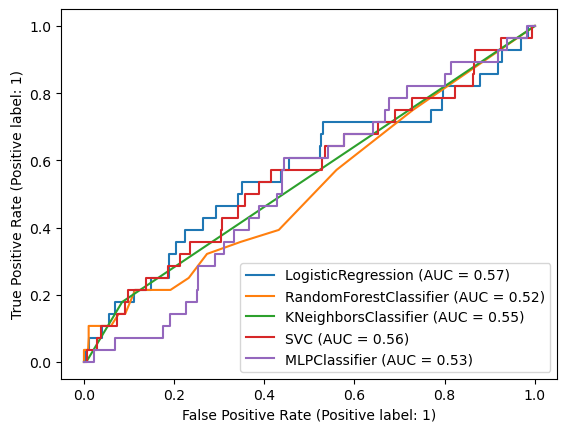

In [26]:
roc_curves = metrics.plot_roc_curve(logreg_clf, test_features, test_labels) 
metrics.plot_roc_curve(rf_clf, test_features, test_labels, ax=roc_curves.ax_) 
metrics.plot_roc_curve(knn_clf, test_features, test_labels, ax=roc_curves.ax_) 
metrics.plot_roc_curve(svm_clf, test_features, test_labels, ax=roc_curves.ax_) 
metrics.plot_roc_curve(mlp_clf, test_features, test_labels, ax=roc_curves.ax_) 